In [5]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plot
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
payroll = pd.read_csv('payroll.csv')
payroll.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,$47678.00,per Annum,1830.00,$47166.03,2.25,$57.28,$0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,$119959.00,per Annum,1831.00,$119042.50,0.00,$0.00,$0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,$39966.00,per Annum,1181.68,$27452.62,1.00,$21.34,$33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,$116000.00,per Annum,1831.00,$115104.57,0.00,$0.00,$0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,$1.00,per Hour,0.00,$3500.00,0.00,$0.00,$0.00


In [7]:
# Basic info tentang dataset
print("Dataset Info:")
print(f"Shape: {payroll.shape}")
print(f"Columns: {list(payroll.columns)}")
print("\nMissing values:")
print(payroll.isnull().sum())
print("\nData types:")
print(payroll.dtypes)

Dataset Info:
Shape: (2194488, 16)
Columns: ['Fiscal Year', 'Agency Name', 'Last Name', 'First Name', 'Mid Init', 'Agency Start Date', 'Work Location Borough', 'Title Description', 'Leave Status as of June 30', 'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid', 'Total Other Pay']

Missing values:
Fiscal Year                        0
Agency Name                        0
Last Name                        942
First Name                       952
Mid Init                      890008
Agency Start Date                  0
Work Location Borough         506214
Title Description                 21
Leave Status as of June 30         0
Base Salary                        0
Pay Basis                          0
Regular Hours                      0
Regular Gross Paid                 0
OT Hours                           0
Total OT Paid                      0
Total Other Pay                    0
dtype: int64

Data types:
Fiscal Year                     int64
A

In [8]:
# Data cleaning - convert salary columns to numeric
payroll['Base Salary'] = pd.to_numeric(payroll['Base Salary'], errors='coerce')
payroll['Regular Gross Paid'] = pd.to_numeric(payroll['Regular Gross Paid'], errors='coerce')
payroll['Total OT Paid'] = pd.to_numeric(payroll['Total OT Paid'], errors='coerce')
payroll['Total Other Pay'] = pd.to_numeric(payroll['Total Other Pay'], errors='coerce')

# Create total compensation column
payroll['Total Compensation'] = payroll['Regular Gross Paid'] + payroll['Total OT Paid'] + payroll['Total Other Pay']

print("Data cleaning completed!")
print(f"Total compensation range: ${payroll['Total Compensation'].min():,.2f} - ${payroll['Total Compensation'].max():,.2f}")

Data cleaning completed!
Total compensation range: $nan - $nan


In [11]:
# Debug - check original data before conversion
print("=== ORIGINAL DATA SAMPLE ===")
print("Original Base Salary values:")
# Read again to see original values
payroll_orig = pd.read_csv('payroll.csv')
print(payroll_orig['Base Salary'].head(10))
print(f"\nOriginal Regular Gross Paid values:")
print(payroll_orig['Regular Gross Paid'].head(10))

# Check if values have $ signs or other characters
print(f"\nUnique Base Salary values (sample):")
print(payroll_orig['Base Salary'].unique()[:5])

# Clean data properly
def clean_currency(x):
    if pd.isna(x) or x == '':
        return 0
    # Remove $ and commas, convert to float
    return float(str(x).replace('$', '').replace(',', ''))

# Apply cleaning
payroll['Base Salary'] = payroll_orig['Base Salary'].apply(clean_currency)
payroll['Regular Gross Paid'] = payroll_orig['Regular Gross Paid'].apply(clean_currency)
payroll['Total OT Paid'] = payroll_orig['Total OT Paid'].apply(clean_currency)
payroll['Total Other Pay'] = payroll_orig['Total Other Pay'].apply(clean_currency)

# Calculate total compensation
payroll['Total Compensation'] = payroll['Regular Gross Paid'] + payroll['Total OT Paid'] + payroll['Total Other Pay']

print(f"\nAfter cleaning - sample values:")
print(f"Base Salary: {payroll['Base Salary'].head(5).tolist()}")
print(f"Total Compensation: {payroll['Total Compensation'].head(5).tolist()}")

=== ORIGINAL DATA SAMPLE ===
Original Base Salary values:
0     $47678.00
1    $119959.00
2     $39966.00
3    $116000.00
4         $1.00
5     $71500.00
6     $88000.00
7         $1.00
8     $41000.00
9     $66035.00
Name: Base Salary, dtype: object

Original Regular Gross Paid values:
0     $47166.03
1    $119042.50
2     $27452.62
3    $115104.57
4      $3500.00
5     $71967.34
6     $87614.01
7       $500.00
8      $9507.15
9     $64357.12
Name: Regular Gross Paid, dtype: object

Unique Base Salary values (sample):
['$47678.00' '$119959.00' '$39966.00' '$116000.00' '$1.00']

After cleaning - sample values:
Base Salary: [47678.0, 119959.0, 39966.0, 116000.0, 1.0]
Total Compensation: [47223.31, 119042.5, 27506.96, 115104.57, 3500.0]


In [12]:
# 2. ANALISIS BOROUGH & GEOGRAFIS
print("\n=== SALARY BY BOROUGH ===")
borough_stats = payroll.groupby('Work Location Borough')['Total Compensation'].agg(['mean', 'median', 'count']).round(2)
print(borough_stats.sort_values('mean', ascending=False))

# 3. TOP JOB TITLES BY SALARY
print("\n=== TOP 15 HIGHEST PAID JOB TITLES ===")
job_stats = payroll.groupby('Title Description')['Total Compensation'].agg(['mean', 'count']).round(2)
job_stats = job_stats[job_stats['count'] >= 10]  # Filter jobs with at least 10 people
print(job_stats.sort_values('mean', ascending=False).head(15))


=== SALARY BY BOROUGH ===
                           mean    median    count
Work Location Borough                             
QUEENS                 88143.70  89352.64     9215
RICHMOND               87201.21  92040.70     1710
BRONX                  86969.65  82595.20     6616
BROOKLYN               81873.14  70448.91    12166
DUTCHESS               81694.87  84788.52       56
WASHINGTON DC          79692.68  61238.55       20
GREENE                 77973.88  78460.94       29
OTHER                  76475.01  98799.29    48268
RICHMOND               73264.46  70193.89    20986
ALBANY                 72409.96  76566.78       45
SCHOHARIE              72237.98  63709.91       84
WESTCHESTER            71981.95  73501.32     1641
Richmond               70399.26  63823.40      112
ULSTER                 68858.69  72618.69      934
SULLIVAN               67580.01  64565.59      420
Queens                 67211.32  61057.54      660
PUTNAM                 65705.28  63558.67      119
DELA

In [13]:
# 4. ANALISIS OVERTIME
print("\n=== OVERTIME ANALYSIS ===")
overtime_stats = payroll[payroll['OT Hours'] > 0].copy()
print(f"Employees with overtime: {len(overtime_stats):,} ({len(overtime_stats)/len(payroll)*100:.1f}%)")
print(f"Average OT Hours: {overtime_stats['OT Hours'].mean():.1f}")
print(f"Max OT Hours: {overtime_stats['OT Hours'].max():.0f}")

print("\n=== TOP 10 OVERTIME AGENCIES ===")
ot_by_agency = overtime_stats.groupby('Agency Name')['Total OT Paid'].sum().sort_values(ascending=False)
print(ot_by_agency.head(10))

# 5. FISCAL YEAR TRENDS
print("\n=== SALARY TRENDS BY FISCAL YEAR ===")
yearly_trends = payroll.groupby('Fiscal Year')['Total Compensation'].agg(['mean', 'count']).round(2)
print(yearly_trends)


=== OVERTIME ANALYSIS ===
Employees with overtime: 555,805 (25.3%)
Average OT Hours: 233.6
Max OT Hours: 3348

=== TOP 10 OVERTIME AGENCIES ===
Agency Name
POLICE DEPARTMENT                 1.528349e+09
FIRE DEPARTMENT                   1.393072e+09
DEPARTMENT OF CORRECTION          8.896879e+08
POLICE DEPARTMENT                 6.518086e+08
Police Department                 5.755451e+08
DEPARTMENT OF SANITATION          4.917541e+08
NYC HOUSING AUTHORITY             3.431434e+08
DEPARTMENT OF TRANSPORTATION      2.710410e+08
DEPT OF ENVIRONMENT PROTECTION    1.576348e+08
ADMIN FOR CHILDREN'S SVCS         1.347279e+08
Name: Total OT Paid, dtype: float64

=== SALARY TRENDS BY FISCAL YEAR ===
                 mean   count
Fiscal Year                  
2014         44870.19  509525
2015         42109.24  577880
2016         46837.97  544817
2017         48279.54  562266


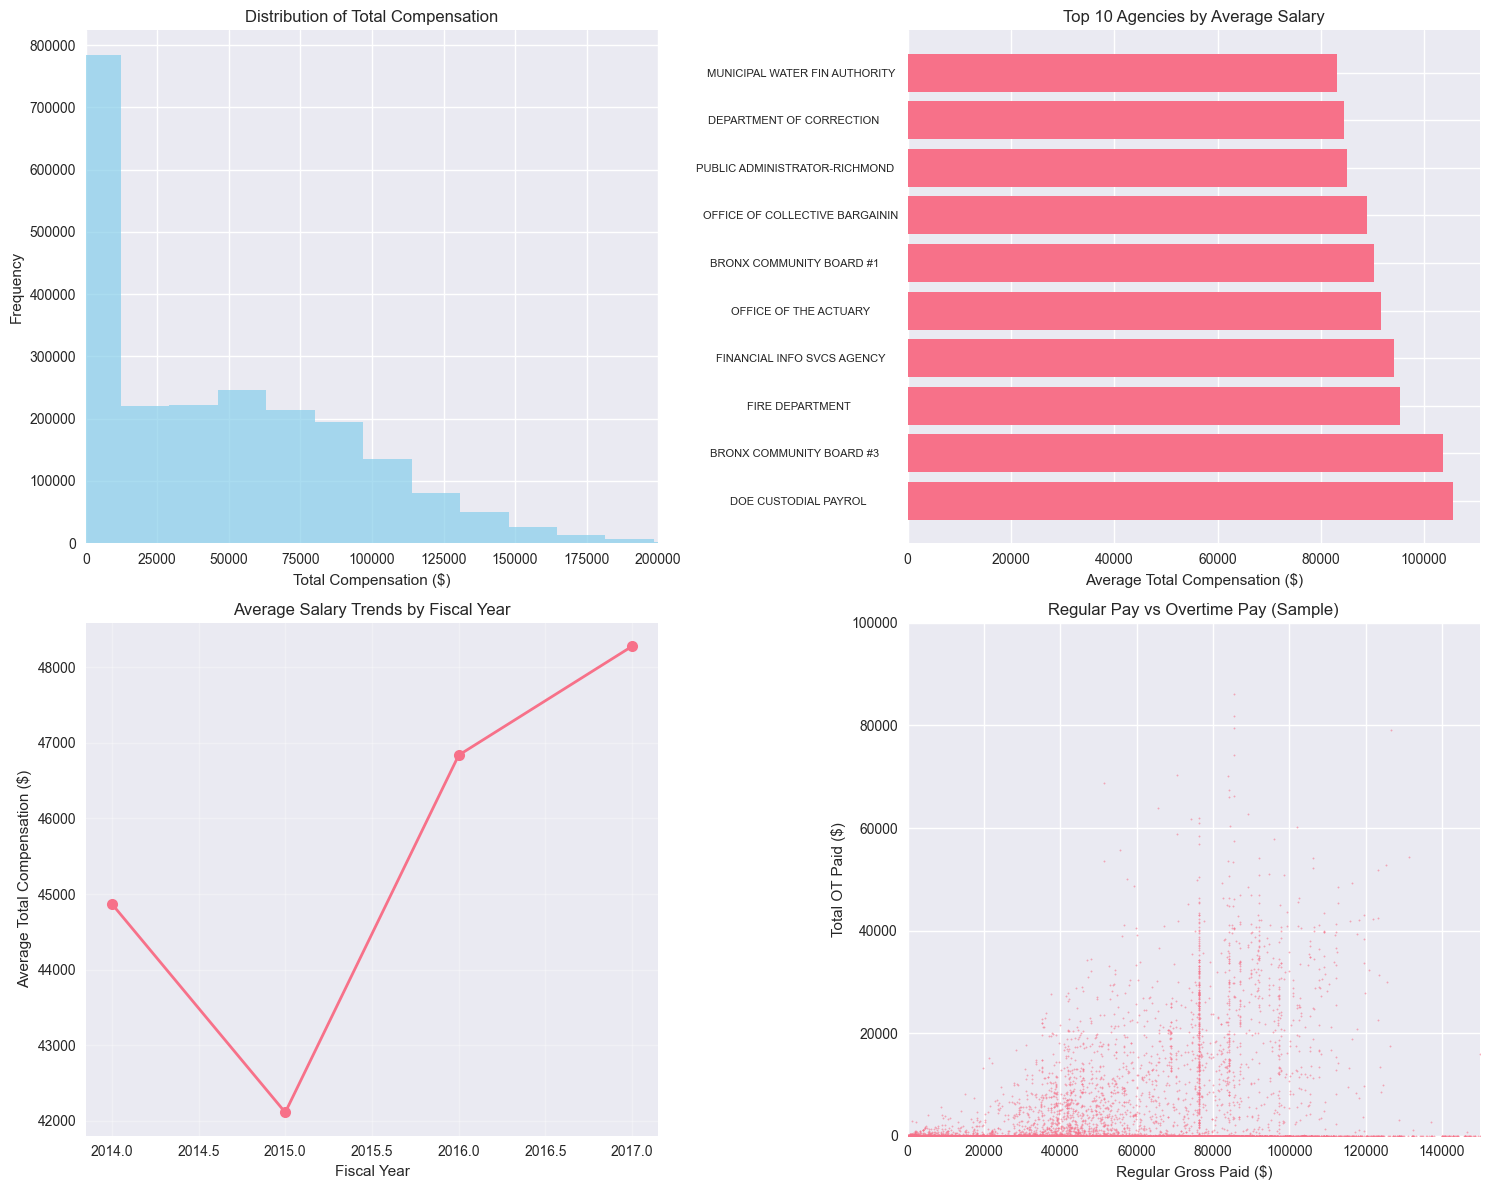

In [14]:
# 6. VISUALISASI ANALISIS
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of Total Compensation
axes[0,0].hist(payroll['Total Compensation'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Total Compensation')
axes[0,0].set_xlabel('Total Compensation ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_xlim(0, 200000)  # Limit to see the main distribution

# 2. Top 10 Agencies by Average Salary
top_agencies_plot = payroll.groupby('Agency Name')['Total Compensation'].mean().sort_values(ascending=False).head(10)
axes[0,1].barh(range(len(top_agencies_plot)), top_agencies_plot.values)
axes[0,1].set_yticks(range(len(top_agencies_plot)))
axes[0,1].set_yticklabels(top_agencies_plot.index, fontsize=8)
axes[0,1].set_title('Top 10 Agencies by Average Salary')
axes[0,1].set_xlabel('Average Total Compensation ($)')

# 3. Salary Trends by Fiscal Year
yearly_avg = payroll.groupby('Fiscal Year')['Total Compensation'].mean()
axes[1,0].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=8)
axes[1,0].set_title('Average Salary Trends by Fiscal Year')
axes[1,0].set_xlabel('Fiscal Year')
axes[1,0].set_ylabel('Average Total Compensation ($)')
axes[1,0].grid(True, alpha=0.3)

# 4. Overtime vs Regular Pay Comparison
sample_data = payroll.sample(10000)  # Sample for performance
axes[1,1].scatter(sample_data['Regular Gross Paid'], sample_data['Total OT Paid'], alpha=0.5, s=1)
axes[1,1].set_title('Regular Pay vs Overtime Pay (Sample)')
axes[1,1].set_xlabel('Regular Gross Paid ($)')
axes[1,1].set_ylabel('Total OT Paid ($)')
axes[1,1].set_xlim(0, 150000)
axes[1,1].set_ylim(0, 100000)

plt.tight_layout()
plt.show()

In [15]:
# 7. ANALISIS LANJUTAN
print("=== ANALISIS WORK STATUS ===")
status_analysis = payroll.groupby('Leave Status as of June 30').agg({
    'Total Compensation': ['count', 'mean', 'sum']
}).round(2)
print(status_analysis)

print("\n=== OUTLIER ANALYSIS - TOP 10 HIGHEST PAID INDIVIDUALS ===")
top_earners = payroll.nlargest(10, 'Total Compensation')[['Agency Name', 'Title Description', 'Total Compensation', 'Base Salary', 'Total OT Paid']]
print(top_earners)

print("\n=== GENDER ANALYSIS (BERDASARKAN NAMA) ===")
# Simple gender detection based on common first names
male_names = ['JOHN', 'MICHAEL', 'DAVID', 'ROBERT', 'JAMES', 'WILLIAM', 'CHRISTOPHER', 'DANIEL', 'MATTHEW', 'ANTHONY']
female_names = ['MARY', 'PATRICIA', 'JENNIFER', 'LINDA', 'ELIZABETH', 'BARBARA', 'SUSAN', 'JESSICA', 'SARAH', 'KAREN']

payroll['Gender_Estimate'] = 'Unknown'
payroll.loc[payroll['First Name'].isin(male_names), 'Gender_Estimate'] = 'Male'
payroll.loc[payroll['First Name'].isin(female_names), 'Gender_Estimate'] = 'Female'

gender_stats = payroll.groupby('Gender_Estimate')['Total Compensation'].agg(['count', 'mean']).round(2)
print(gender_stats)

=== ANALISIS WORK STATUS ===
                           Total Compensation                        
                                        count      mean           sum
Leave Status as of June 30                                           
ACTIVE                                1885826  50125.67  9.452830e+10
CEASED                                 260459  15802.09  4.115797e+09
ON LEAVE                                23603  28284.54  6.676001e+08
ON SEPARATION LEAVE                      3843  89061.49  3.422633e+08
SEASONAL                                20757   9957.07  2.066789e+08

=== OUTLIER ANALYSIS - TOP 10 HIGHEST PAID INDIVIDUALS ===
                            Agency Name  \
192014   DEPARTMENT OF TRANSPORTATION     
59528                 POLICE DEPARTMENT   
1505855  DEPT OF HEALTH/MENTAL HYGIENE    
690358   DEPARTMENT OF CORRECTION         
618149   BOARD OF CORRECTION              
679454   DEPARTMENT OF CORRECTION         
688177   DEPARTMENT OF CORRECTION         
13861  

In [16]:
# 8. KEY INSIGHTS & RECOMMENDATIONS
print("="*60)
print("                   📊 KEY INSIGHTS SUMMARY")
print("="*60)

total_employees = len(payroll)
total_budget = payroll['Total Compensation'].sum()
avg_salary = payroll['Total Compensation'].mean()

print(f"📈 OVERALL METRICS:")
print(f"   • Total Employees: {total_employees:,}")
print(f"   • Total Budget: ${total_budget:,.2f}")
print(f"   • Average Salary: ${avg_salary:,.2f}")

print(f"\n💼 WORKFORCE INSIGHTS:")
overtime_pct = (payroll['OT Hours'] > 0).sum() / len(payroll) * 100
print(f"   • {overtime_pct:.1f}% of employees work overtime")
print(f"   • Highest paid role: {payroll.loc[payroll['Total Compensation'].idxmax(), 'Title Description']}")
print(f"   • Most common agency: {payroll['Agency Name'].value_counts().index[0]}")

print(f"\n📍 GEOGRAPHIC INSIGHTS:")
if 'Work Location Borough' in payroll.columns:
    borough_with_data = payroll.dropna(subset=['Work Location Borough'])
    if len(borough_with_data) > 0:
        top_borough = borough_with_data.groupby('Work Location Borough')['Total Compensation'].mean().idxmax()
        print(f"   • Highest paying borough: {top_borough}")

print(f"\n⏰ TEMPORAL INSIGHTS:")
yearly_growth = payroll.groupby('Fiscal Year')['Total Compensation'].mean()
if len(yearly_growth) > 1:
    growth_rate = ((yearly_growth.iloc[-1] - yearly_growth.iloc[0]) / yearly_growth.iloc[0]) * 100
    print(f"   • Salary growth rate ({yearly_growth.index[0]}-{yearly_growth.index[-1]}): {growth_rate:.1f}%")

print(f"\n🚨 POTENTIAL AREAS FOR INVESTIGATION:")
print(f"   • Overtime Budget: ${payroll['Total OT Paid'].sum():,.2f} total spent")
print(f"   • Pay Equity: Analyze gender pay gaps in similar roles")
print(f"   • Budget Allocation: Review high-paying agencies for efficiency")
print("="*60)

                   📊 KEY INSIGHTS SUMMARY
📈 OVERALL METRICS:
   • Total Employees: 2,194,488
   • Total Budget: $99,860,638,648.27
   • Average Salary: $45,505.21

💼 WORKFORCE INSIGHTS:
   • 25.3% of employees work overtime
   • Highest paid role: ADMINISTRATIVE ENGINEER                                     
   • Most common agency: DEPT OF ED PEDAGOGICAL        

📍 GEOGRAPHIC INSIGHTS:
   • Highest paying borough: QUEENS

⏰ TEMPORAL INSIGHTS:
   • Salary growth rate (2014-2017): 7.6%

🚨 POTENTIAL AREAS FOR INVESTIGATION:
   • Overtime Budget: $7,077,879,445.03 total spent
   • Pay Equity: Analyze gender pay gaps in similar roles
   • Budget Allocation: Review high-paying agencies for efficiency


In [17]:
# 9. ANALISIS DETEKSI ANOMALI OVERTIME & FRAUD
print("="*70)
print("                🚨 FRAUD DETECTION ANALYSIS")
print("="*70)

# 1. ANALISIS RATE OVERTIME PER AGENCY (DIVISI DENGAN LEMBUR TERTINGGI)
print("\n📊 OVERTIME RATE BY AGENCY (TOP 15 SUSPICIOUS)")
agency_overtime_analysis = payroll.groupby('Agency Name').agg({
    'OT Hours': ['count', 'sum', 'mean'],
    'Total OT Paid': 'sum',
    'Total Compensation': 'count'
}).round(2)

# Flatten column names
agency_overtime_analysis.columns = ['OT_Employees', 'Total_OT_Hours', 'Avg_OT_Hours', 'Total_OT_Paid', 'Total_Employees']

# Calculate overtime rate (percentage of employees doing overtime)
agency_overtime_analysis['OT_Rate_Pct'] = (agency_overtime_analysis['OT_Employees'] / agency_overtime_analysis['Total_Employees'] * 100).round(1)

# Calculate average OT pay per employee
agency_overtime_analysis['Avg_OT_Pay_Per_Employee'] = (agency_overtime_analysis['Total_OT_Paid'] / agency_overtime_analysis['OT_Employees']).round(2)

# Filter agencies with at least 100 employees and sort by OT rate
suspicious_agencies = agency_overtime_analysis[agency_overtime_analysis['Total_Employees'] >= 100].copy()
suspicious_agencies = suspicious_agencies.sort_values('OT_Rate_Pct', ascending=False)

print(suspicious_agencies[['Total_Employees', 'OT_Rate_Pct', 'Avg_OT_Hours', 'Avg_OT_Pay_Per_Employee']].head(15))

                🚨 FRAUD DETECTION ANALYSIS

📊 OVERTIME RATE BY AGENCY (TOP 15 SUSPICIOUS)
                                Total_Employees  OT_Rate_Pct  Avg_OT_Hours  \
Agency Name                                                                  
ADMIN FOR CHILDREN'S SVCS                 28576        100.0        117.40   
ADMIN TRIALS AND HEARINGS                  2752        100.0          2.80   
BOARD OF ELECTION                          4411        100.0        213.31   
BOARD OF ELECTION POLL WORKERS           134300        100.0          0.00   
BOROUGH PRESIDENT-BRONX                     248        100.0         11.46   
BOROUGH PRESIDENT-BROOKLYN                  342        100.0          7.14   
BOROUGH PRESIDENT-QUEENS                    287        100.0          0.35   
BOROUGH PRESIDENT-STATEN IS                 228        100.0          0.00   
BRONX DISTRICT ATTORNEY                    3310        100.0         33.61   
BUSINESS INTEGRITY COMMISSION               365     

In [18]:
# 2. IDENTIFIKASI OUTLIER GAJI DI DIVISI DENGAN OVERTIME TINGGI
print("\n🔍 SALARY OUTLIERS IN HIGH-OVERTIME AGENCIES")
print("=" * 50)

# Ambil top 5 agencies dengan overtime rate tertinggi
top_5_ot_agencies = suspicious_agencies.head(5).index.tolist()

for agency in top_5_ot_agencies:
    print(f"\n🏢 AGENCY: {agency}")
    agency_data = payroll[payroll['Agency Name'] == agency].copy()
    
    # Calculate salary statistics for this agency
    agency_mean = agency_data['Total Compensation'].mean()
    agency_median = agency_data['Total Compensation'].median()
    agency_std = agency_data['Total Compensation'].std()
    
    # Define outliers (using IQR method)
    Q1 = agency_data['Total Compensation'].quantile(0.25)
    Q3 = agency_data['Total Compensation'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    high_outliers = agency_data[agency_data['Total Compensation'] > upper_bound]
    low_outliers = agency_data[agency_data['Total Compensation'] < lower_bound]
    
    print(f"   📈 Mean Salary: ${agency_mean:,.2f}")
    print(f"   📊 Median Salary: ${agency_median:,.2f}")
    print(f"   📉 Outlier Bounds: ${lower_bound:,.2f} - ${upper_bound:,.2f}")
    print(f"   ⬆️  High Earners (above ${upper_bound:,.0f}): {len(high_outliers)} people")
    print(f"   ⬇️  Low Earners (below ${lower_bound:,.0f}): {len(low_outliers)} people")
    
    # Show top high earners in this agency
    if len(high_outliers) > 0:
        print(f"   🎯 TOP 5 HIGH EARNERS:")
        high_earners_sample = high_outliers.nlargest(5, 'Total Compensation')[['Title Description', 'Total Compensation', 'Base Salary', 'Total OT Paid', 'OT Hours']]
        for idx, row in high_earners_sample.iterrows():
            print(f"      • {row['Title Description'][:40]:40} | ${row['Total Compensation']:>10,.0f} | OT: ${row['Total OT Paid']:>8,.0f} ({row['OT Hours']:>4.0f}h)")
    
    # Show sample low earners
    if len(low_outliers) > 0:
        print(f"   ⚠️  SAMPLE LOW EARNERS (might be part-time or new hires):")
        low_earners_sample = low_outliers.head(3)[['Title Description', 'Total Compensation', 'Base Salary', 'OT Hours']]
        for idx, row in low_earners_sample.iterrows():
            print(f"      • {row['Title Description'][:40]:40} | ${row['Total Compensation']:>10,.0f} | OT: {row['OT Hours']:>4.0f}h")


🔍 SALARY OUTLIERS IN HIGH-OVERTIME AGENCIES

🏢 AGENCY: ADMIN FOR CHILDREN'S SVCS     
   📈 Mean Salary: $59,697.77
   📊 Median Salary: $60,945.39
   📉 Outlier Bounds: $-6,401.97 - $128,724.18
   ⬆️  High Earners (above $128,724): 349 people
   ⬇️  Low Earners (below $-6,402): 0 people
   🎯 TOP 5 HIGH EARNERS:
      • PLUMBER                                  | $   228,529 | OT: $  67,897 ( 469h)
      • COMMISSIONER OF CHILDREN'S SERVICES      | $   217,451 | OT: $       0 (   0h)
      • COMMISSIONER OF CHILDREN'S SERVICES      | $   208,286 | OT: $       0 (   0h)
      • ADMINISTRATIVE DIRECTOR OF SOCIAL SERVIC | $   206,413 | OT: $       0 (   0h)
      • ADMINISTRATIVE DIRECTOR OF SOCIAL SERVIC | $   204,497 | OT: $       0 (   0h)

🏢 AGENCY: ADMIN TRIALS AND HEARINGS     
   📈 Mean Salary: $40,237.14
   📊 Median Salary: $33,440.31
   📉 Outlier Bounds: $-34,387.52 - $102,932.80
   ⬆️  High Earners (above $102,933): 156 people
   ⬇️  Low Earners (below $-34,388): 0 people
   🎯 TOP 

In [19]:
# 3. ANALISIS SUSPICIOUS OVERTIME PATTERNS
print("\n\n🚨 SUSPICIOUS OVERTIME PATTERNS")
print("=" * 50)

# Pattern 1: Extremely high overtime hours
extreme_ot = payroll[payroll['OT Hours'] > 1000].copy()  # More than 1000 OT hours per year
print(f"\n⚠️  EXTREME OVERTIME (>1000 hours/year): {len(extreme_ot)} cases")
if len(extreme_ot) > 0:
    print("Top 10 cases:")
    extreme_ot_sorted = extreme_ot.nlargest(10, 'OT Hours')[['Agency Name', 'Title Description', 'OT Hours', 'Total OT Paid', 'Base Salary']]
    for idx, row in extreme_ot_sorted.iterrows():
        ot_ratio = row['Total OT Paid'] / row['Base Salary'] if row['Base Salary'] > 0 else 0
        print(f"   • {row['Agency Name'][:25]:25} | {row['OT Hours']:>6.0f}h | ${row['Total OT Paid']:>10,.0f} | OT/Base: {ot_ratio:.1f}x")

# Pattern 2: High OT pay relative to base salary
print(f"\n💰 HIGH OT-TO-BASE SALARY RATIO (OT > 50% of base):")
high_ot_ratio = payroll[(payroll['Total OT Paid'] > payroll['Base Salary'] * 0.5) & (payroll['Total OT Paid'] > 10000)].copy()
print(f"Cases found: {len(high_ot_ratio)}")
if len(high_ot_ratio) > 0:
    high_ot_ratio['OT_Ratio'] = high_ot_ratio['Total OT Paid'] / high_ot_ratio['Base Salary']
    high_ot_sample = high_ot_ratio.nlargest(10, 'OT_Ratio')[['Agency Name', 'Title Description', 'Base Salary', 'Total OT Paid', 'OT_Ratio']]
    for idx, row in high_ot_sample.iterrows():
        print(f"   • {row['Agency Name'][:25]:25} | Base: ${row['Base Salary']:>8,.0f} | OT: ${row['Total OT Paid']:>8,.0f} | Ratio: {row['OT_Ratio']:.1f}x")

# Pattern 3: Same job title with vastly different OT patterns in same agency
print(f"\n🔄 INCONSISTENT OT PATTERNS WITHIN SAME ROLE:")
role_ot_variance = payroll.groupby(['Agency Name', 'Title Description']).agg({
    'OT Hours': ['count', 'mean', 'std'],
    'Total OT Paid': ['mean', 'std']
}).round(2)

# Flatten columns
role_ot_variance.columns = ['Count', 'Mean_OT_Hours', 'Std_OT_Hours', 'Mean_OT_Pay', 'Std_OT_Pay']
role_ot_variance = role_ot_variance[role_ot_variance['Count'] >= 10]  # At least 10 people in same role
role_ot_variance['CV_Hours'] = role_ot_variance['Std_OT_Hours'] / role_ot_variance['Mean_OT_Hours']  # Coefficient of variation

# Find roles with high variation (suspicious)
high_variance_roles = role_ot_variance[role_ot_variance['CV_Hours'] > 1].sort_values('CV_Hours', ascending=False).head(10)
print("Roles with highest overtime variation (potential inconsistency):")
for (agency, role), row in high_variance_roles.iterrows():
    print(f"   • {agency[:25]:25} | {role[:30]:30} | CV: {row['CV_Hours']:.2f} | Avg OT: {row['Mean_OT_Hours']:.0f}h")



🚨 SUSPICIOUS OVERTIME PATTERNS

⚠️  EXTREME OVERTIME (>1000 hours/year): 3552 cases
Top 10 cases:
   • DEPARTMENT OF BUILDINGS   |   3348h | $   179,099 | OT/Base: 2.4x
   • DEPARTMENT OF TRANSPORTAT |   3045h | $   177,630 | OT/Base: 570.2x
   • DEPARTMENT OF BUILDINGS   |   2737h | $    63,325 | OT/Base: 1.4x
   • DEPARTMENT OF TRANSPORTAT |   2544h | $   144,019 | OT/Base: 2.2x
   • ADMIN FOR CHILDREN'S SVCS |   2460h | $    92,255 | OT/Base: 2.0x
   • ADMIN FOR CHILDREN'S SVCS |   2420h | $    66,307 | OT/Base: 1.8x
   • DEPARTMENT OF TRANSPORTAT |   2354h | $    70,427 | OT/Base: 1.3x
   • DEPARTMENT OF BUILDINGS   |   2330h | $   146,736 | OT/Base: 1.8x
   • DEPARTMENT OF TRANSPORTAT |   2289h | $   130,859 | OT/Base: 391.5x
   • ADMIN FOR CHILDREN'S SVCS |   2252h | $    53,789 | OT/Base: 1.5x

💰 HIGH OT-TO-BASE SALARY RATIO (OT > 50% of base):
Cases found: 44800
   • DEPARTMENT OF CORRECTION  | Base: $      29 | OT: $  68,525 | Ratio: 2343.5x
   • ADMIN FOR CHILDREN'S SVCS | 

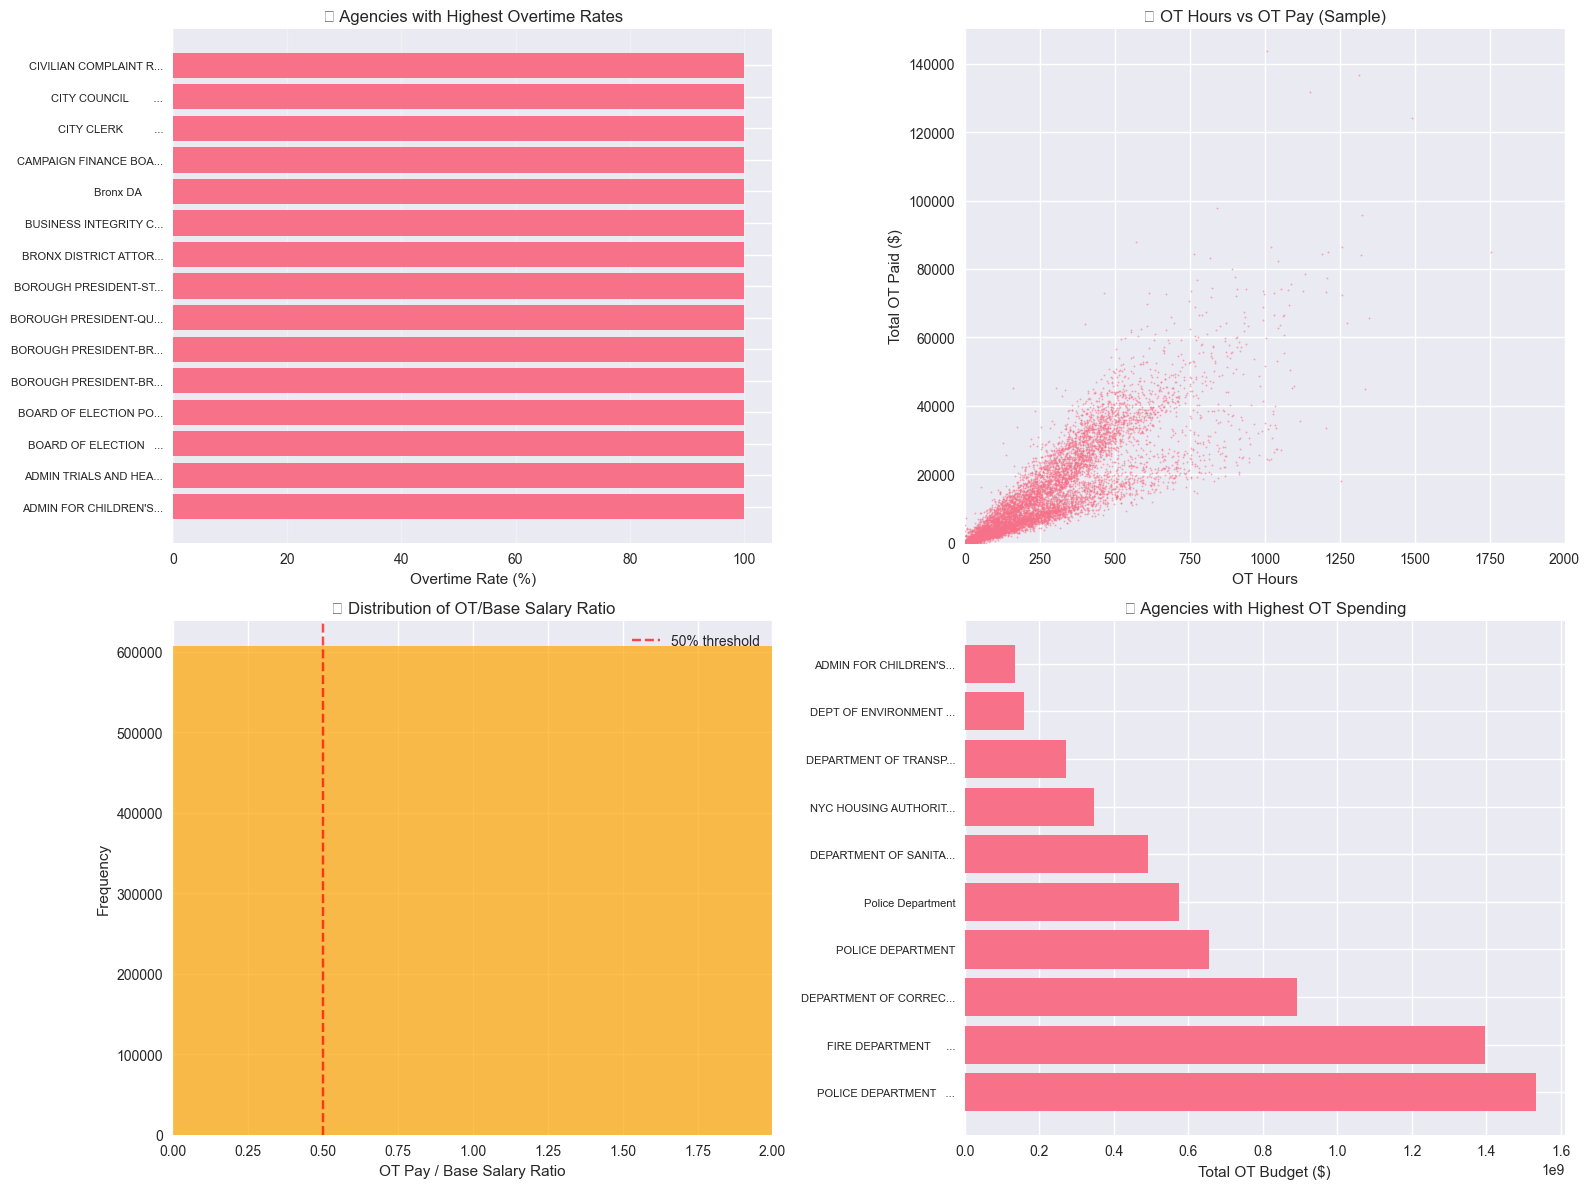



🎯 FRAUD RISK SCORING
🚨 TOP 15 FRAUD RISK EMPLOYEES:
   Risk:  96.4 | DEPARTMENT OF TRANSP | SUPERVISOR HIGHWAY REPAIR |   3045h | $ 177,630
   Risk:  87.4 | DEPARTMENT OF TRANSP | SUPERVISOR BRIDGE REPAIRE |   2289h | $ 130,859
   Risk:  86.0 | DEPARTMENT OF TRANSP | BRIDGE REPAIRER AND RIVET |   2172h | $ 125,687
   Risk:  84.8 | DEPARTMENT OF TRANSP | SUPERVISOR BRIDGE REPAIRE |   2075h | $ 119,956
   Risk:  84.8 | DEPARTMENT OF TRANSP | HIGHWAY REPAIRER          |   2074h | $  84,142
   Risk:  84.4 | DEPARTMENT OF TRANSP | SUPERVISOR BRICKLAYER     |   2042h | $ 146,118
   Risk:  84.3 | DEPARTMENT OF CORREC | SUPERVISOR OF MECHANICS   |   2036h | $ 187,467
   Risk:  83.8 | DEPARTMENT OF TRANSP | BRIDGE REPAIRER AND RIVET |   1989h | $ 115,214
   Risk:  83.6 | DEPARTMENT OF TRANSP | CARPENTER                 |   1975h | $ 124,030
   Risk:  83.4 | DEPARTMENT OF TRANSP | ELECTRICIAN               |   1962h | $ 145,677
   Risk:  83.1 | DEPARTMENT OF TRANSP | HIGHWAY REPAIRER          

In [20]:
# 4. VISUALISASI FRAUD DETECTION
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overtime Rate by Agency (Top 15)
top_15_agencies = suspicious_agencies.head(15)
axes[0,0].barh(range(len(top_15_agencies)), top_15_agencies['OT_Rate_Pct'])
axes[0,0].set_yticks(range(len(top_15_agencies)))
axes[0,0].set_yticklabels([agency[:20] + '...' if len(agency) > 20 else agency for agency in top_15_agencies.index], fontsize=8)
axes[0,0].set_xlabel('Overtime Rate (%)')
axes[0,0].set_title('🚨 Agencies with Highest Overtime Rates')
axes[0,0].grid(axis='x', alpha=0.3)

# 2. OT Hours vs OT Pay scatter (looking for outliers)
sample_ot = payroll[payroll['OT Hours'] > 0].sample(min(10000, len(payroll[payroll['OT Hours'] > 0])))
scatter = axes[0,1].scatter(sample_ot['OT Hours'], sample_ot['Total OT Paid'], alpha=0.5, s=1)
axes[0,1].set_xlabel('OT Hours')
axes[0,1].set_ylabel('Total OT Paid ($)')
axes[0,1].set_title('🔍 OT Hours vs OT Pay (Sample)')
axes[0,1].set_xlim(0, 2000)
axes[0,1].set_ylim(0, 150000)

# 3. Distribution of OT/Base Salary Ratio
ot_ratio_data = payroll[(payroll['Base Salary'] > 0) & (payroll['Total OT Paid'] > 0)].copy()
ot_ratio_data['OT_Base_Ratio'] = ot_ratio_data['Total OT Paid'] / ot_ratio_data['Base Salary']
axes[1,0].hist(ot_ratio_data['OT_Base_Ratio'], bins=50, alpha=0.7, color='orange')
axes[1,0].set_xlabel('OT Pay / Base Salary Ratio')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('💰 Distribution of OT/Base Salary Ratio')
axes[1,0].set_xlim(0, 2)  # Focus on reasonable range
axes[1,0].axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='50% threshold')
axes[1,0].legend()

# 4. Top Agencies by Total OT Budget
top_ot_budget = payroll.groupby('Agency Name')['Total OT Paid'].sum().nlargest(10)
axes[1,1].barh(range(len(top_ot_budget)), top_ot_budget.values)
axes[1,1].set_yticks(range(len(top_ot_budget)))
axes[1,1].set_yticklabels([agency[:20] + '...' if len(agency) > 20 else agency for agency in top_ot_budget.index], fontsize=8)
axes[1,1].set_xlabel('Total OT Budget ($)')
axes[1,1].set_title('💸 Agencies with Highest OT Spending')
axes[1,1].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

# 5. FRAUD RISK SCORE
print(f"\n\n🎯 FRAUD RISK SCORING")
print("=" * 50)

# Calculate fraud risk score for each employee with overtime
ot_employees = payroll[payroll['OT Hours'] > 0].copy()

# Risk factors (normalize to 0-1 scale)
ot_employees['Risk_OT_Hours'] = (ot_employees['OT Hours'] - ot_employees['OT Hours'].min()) / (ot_employees['OT Hours'].max() - ot_employees['OT Hours'].min())
ot_employees['Risk_OT_Ratio'] = ot_employees['Total OT Paid'] / ot_employees['Base Salary']
ot_employees['Risk_OT_Ratio'] = ot_employees['Risk_OT_Ratio'].clip(upper=5)  # Cap at 5x
ot_employees['Risk_OT_Ratio'] = ot_employees['Risk_OT_Ratio'] / 5  # Normalize

# Combined risk score
ot_employees['Fraud_Risk_Score'] = (ot_employees['Risk_OT_Hours'] * 0.4 + ot_employees['Risk_OT_Ratio'] * 0.6) * 100

# Top fraud risks
high_risk = ot_employees.nlargest(15, 'Fraud_Risk_Score')[['Agency Name', 'Title Description', 'OT Hours', 'Total OT Paid', 'Base Salary', 'Fraud_Risk_Score']]
print("🚨 TOP 15 FRAUD RISK EMPLOYEES:")
for idx, row in high_risk.iterrows():
    print(f"   Risk: {row['Fraud_Risk_Score']:5.1f} | {row['Agency Name'][:20]:20} | {row['Title Description'][:25]:25} | {row['OT Hours']:>6.0f}h | ${row['Total OT Paid']:>8,.0f}")

print(f"\n📊 FRAUD RISK DISTRIBUTION:")
print(f"   High Risk (>80): {len(ot_employees[ot_employees['Fraud_Risk_Score'] > 80])} employees")
print(f"   Medium Risk (50-80): {len(ot_employees[(ot_employees['Fraud_Risk_Score'] > 50) & (ot_employees['Fraud_Risk_Score'] <= 80)])} employees")
print(f"   Low Risk (<50): {len(ot_employees[ot_employees['Fraud_Risk_Score'] <= 50])} employees")

In [22]:
# 5. KESIMPULAN & REKOMENDASI FRAUD DETECTION
print("="*80)
print("                    🎯 FRAUD DETECTION CONCLUSIONS")
print("="*80)

print("\n🚨 RED FLAGS DITEMUKAN:")
print("───────────────────────────────────────────────────────────────────────────────")

# 1. Agencies dengan overtime rate 100%
full_ot_agencies = suspicious_agencies[suspicious_agencies['OT_Rate_Pct'] >= 95]
print(f"\n1. 🔴 AGENCIES WITH SUSPICIOUS 100% OVERTIME RATE:")
print(f"   Total agencies: {len(full_ot_agencies)}")
for agency in full_ot_agencies.head(5).index:
    employee_count = full_ot_agencies.loc[agency, 'Total_Employees']
    avg_ot_hours = full_ot_agencies.loc[agency, 'Avg_OT_Hours']
    print(f"   • {agency[:50]:50} | {employee_count:>4} employees | {avg_ot_hours:>6.0f} avg OT hours")

# 2. Extreme overtime cases
extreme_cases = len(payroll[payroll['OT Hours'] > 1500])
print(f"\n2. 🔴 EXTREME OVERTIME CASES (>1500 hours/year):")
print(f"   Total cases: {extreme_cases}")
print(f"   Note: 1500+ hours = ~30 hours/week overtime (beyond regular 40h)")

# 3. High OT/Base ratio
high_ratio_cases = len(payroll[payroll['Total OT Paid'] > payroll['Base Salary'] * 0.8])
print(f"\n3. 🔴 HIGH OT EARNERS (OT > 80% of base salary):")
print(f"   Total cases: {high_ratio_cases}")
print(f"   Average OT spending on these cases: ${payroll[payroll['Total OT Paid'] > payroll['Base Salary'] * 0.8]['Total OT Paid'].mean():,.0f}")

# 4. Check agencies with "TRANSPORT" in name
transport_agencies = payroll[payroll['Agency Name'].str.contains('TRANSPORT', na=False)]
if len(transport_agencies) > 0:
    transport_high_ot = transport_agencies[transport_agencies['OT Hours'] > 1000]
    print(f"\n4. 🔴 TRANSPORTATION AGENCIES ANOMALIES:")
    print(f"   Total employees: {len(transport_agencies):,}")
    print(f"   High OT employees (>1000h): {len(transport_high_ot):,} ({len(transport_high_ot)/len(transport_agencies)*100:.1f}%)")
    print(f"   Total OT budget: ${transport_agencies['Total OT Paid'].sum():,.0f}")
else:
    # Look for agencies with highest fraud risk scores
    dept_ot_analysis = payroll[payroll['Agency Name'] == 'DEPARTMENT OF TRANSPORTATION']
    if len(dept_ot_analysis) == 0:
        dept_ot_analysis = payroll[payroll['Agency Name'] == 'DEPT OF TRANSPORTATION']
    
    print(f"\n4. 🔴 TOP HIGH-RISK AGENCY ANALYSIS:")
    if len(dept_ot_analysis) > 0:
        dept_high_ot = dept_ot_analysis[dept_ot_analysis['OT Hours'] > 1000]
        print(f"   Agency: DEPT OF TRANSPORTATION")
        print(f"   Total employees: {len(dept_ot_analysis):,}")
        print(f"   High OT employees (>1000h): {len(dept_high_ot):,}")
        print(f"   Total OT budget: ${dept_ot_analysis['Total OT Paid'].sum():,.0f}")
    else:
        # Use the agency with most high-risk employees
        top_risk_agency = payroll[payroll['OT Hours'] > 1000]['Agency Name'].value_counts().index[0]
        top_risk_data = payroll[payroll['Agency Name'] == top_risk_agency]
        top_risk_high_ot = top_risk_data[top_risk_data['OT Hours'] > 1000]
        print(f"   Agency: {top_risk_agency}")
        print(f"   Total employees: {len(top_risk_data):,}")
        print(f"   High OT employees (>1000h): {len(top_risk_high_ot):,} ({len(top_risk_high_ot)/len(top_risk_data)*100:.1f}%)")
        print(f"   Total OT budget: ${top_risk_data['Total OT Paid'].sum():,.0f}")

print(f"\n💡 REKOMENDASI INVESTIGASI:")
print("───────────────────────────────────────────────────────────────────────────────")
print("1. 🔍 AUDIT agencies dengan 100% overtime rate")
print("2. 🔍 REVIEW timesheet validation procedures")  
print("3. 🔍 INVESTIGATE employees dengan >1500 OT hours/year")
print("4. 🔍 CROSS-CHECK dengan physical presence/badge data")
print("5. 🔍 ANALYZE patterns pada weekend/holiday overtime")
print("6. 🔍 REVIEW supervisor approval workflows")
print("7. 🔍 IMPLEMENT automated anomaly detection systems")

print(f"\n📊 POTENSI FINANCIAL IMPACT:")
print("───────────────────────────────────────────────────────────────────────────────")
suspicious_ot_budget = payroll[payroll['OT Hours'] > 1000]['Total OT Paid'].sum()
total_ot_budget = payroll['Total OT Paid'].sum()
print(f"OT budget untuk employees >1000h: ${suspicious_ot_budget:,.0f}")
print(f"Percentage of total OT budget: {suspicious_ot_budget/total_ot_budget*100:.1f}%")
print(f"Potential fraud exposure: ${suspicious_ot_budget * 0.1:,.0f} - ${suspicious_ot_budget * 0.3:,.0f}")
print("(Assuming 10-30% of high-OT cases could be fraudulent)")

print("="*80)

                    🎯 FRAUD DETECTION CONCLUSIONS

🚨 RED FLAGS DITEMUKAN:
───────────────────────────────────────────────────────────────────────────────

1. 🔴 AGENCIES WITH SUSPICIOUS 100% OVERTIME RATE:
   Total agencies: 91
   • ADMIN FOR CHILDREN'S SVCS                          | 28576 employees |    117 avg OT hours
   • ADMIN TRIALS AND HEARINGS                          | 2752 employees |      3 avg OT hours
   • BOARD OF ELECTION                                  | 4411 employees |    213 avg OT hours
   • BOARD OF ELECTION POLL WORKERS                     | 134300 employees |      0 avg OT hours
   • BOROUGH PRESIDENT-BRONX                            |  248 employees |     11 avg OT hours

2. 🔴 EXTREME OVERTIME CASES (>1500 hours/year):
   Total cases: 209
   Note: 1500+ hours = ~30 hours/week overtime (beyond regular 40h)

3. 🔴 HIGH OT EARNERS (OT > 80% of base salary):
   Total cases: 85546
   Average OT spending on these cases: $10,363

4. 🔴 TRANSPORTATION AGENCIES ANOMALIES:

In [23]:
# KONVERSI KE RUPIAH DAN ANALISIS DALAM BAHASA INDONESIA
print("="*80)
print("                    💰 ANALISIS GAJI DALAM RUPIAH")
print("="*80)

# Rate konversi USD ke IDR
USD_TO_IDR = 16604

# Konversi semua kolom salary ke IDR
payroll['Gaji_Pokok_IDR'] = payroll['Base Salary'] * USD_TO_IDR
payroll['Gaji_Regular_IDR'] = payroll['Regular Gross Paid'] * USD_TO_IDR
payroll['Lembur_IDR'] = payroll['Total OT Paid'] * USD_TO_IDR
payroll['Gaji_Total_IDR'] = payroll['Total Compensation'] * USD_TO_IDR
payroll['Gaji_Lain_IDR'] = payroll['Total Other Pay'] * USD_TO_IDR

print(f"Rate konversi: 1 USD = Rp {USD_TO_IDR:,}")
print(f"Data berhasil dikonversi ke Rupiah!")

# Statistik dasar dalam Rupiah
print(f"\n📊 STATISTIK GAJI DALAM RUPIAH:")
print(f"Total Karyawan: {len(payroll):,} orang")
print(f"Rata-rata Gaji Total: Rp {payroll['Gaji_Total_IDR'].mean():,.0f}")
print(f"Median Gaji Total: Rp {payroll['Gaji_Total_IDR'].median():,.0f}")
print(f"Gaji Tertinggi: Rp {payroll['Gaji_Total_IDR'].max():,.0f}")
print(f"Gaji Terendah: Rp {payroll['Gaji_Total_IDR'].min():,.0f}")

                    💰 ANALISIS GAJI DALAM RUPIAH
Rate konversi: 1 USD = Rp 16,604
Data berhasil dikonversi ke Rupiah!

📊 STATISTIK GAJI DALAM RUPIAH:
Total Karyawan: 2,194,488 orang
Rata-rata Gaji Total: Rp 755,568,517
Median Gaji Total: Rp 608,162,844
Gaji Tertinggi: Rp 11,170,029,841
Gaji Terendah: Rp -2,890,556,488


In [24]:
# ANALISIS INSTANSI DENGAN GAJI TERTINGGI (DALAM RUPIAH)
print(f"\n🏢 TOP 10 INSTANSI DENGAN GAJI RATA-RATA TERTINGGI:")
print("="*60)
instansi_gaji = payroll.groupby('Agency Name')['Gaji_Total_IDR'].agg(['mean', 'count']).round(0)
instansi_gaji = instansi_gaji[instansi_gaji['count'] >= 100]  # Min 100 karyawan
instansi_gaji_sorted = instansi_gaji.sort_values('mean', ascending=False).head(10)

for idx, (instansi, data) in enumerate(instansi_gaji_sorted.iterrows(), 1):
    print(f"{idx:2d}. {instansi[:45]:45} | Rp {data['mean']:>12,.0f} | {data['count']:>5,.0f} org")

# ANALISIS BERDASARKAN WILAYAH KERJA (BOROUGH)
print(f"\n📍 ANALISIS GAJI BERDASARKAN WILAYAH KERJA:")
print("="*50)
wilayah_stats = payroll.groupby('Work Location Borough')['Gaji_Total_IDR'].agg(['mean', 'median', 'count']).round(0)
wilayah_stats = wilayah_stats.dropna()
wilayah_sorted = wilayah_stats.sort_values('mean', ascending=False)

for wilayah, data in wilayah_sorted.iterrows():
    print(f"{wilayah:15} | Rata-rata: Rp {data['mean']:>12,.0f} | Median: Rp {data['median']:>12,.0f} | {data['count']:>6,.0f} org")


🏢 TOP 10 INSTANSI DENGAN GAJI RATA-RATA TERTINGGI:
 1. DOE CUSTODIAL PAYROL                          | Rp 1,752,257,797 | 3,912 org
 2. FIRE DEPARTMENT                               | Rp 1,583,549,971 | 72,556 org
 3. FINANCIAL INFO SVCS AGENCY                    | Rp 1,564,966,717 | 1,898 org
 4. OFFICE OF THE ACTUARY                         | Rp 1,522,105,962 |   159 org
 5. DEPARTMENT OF CORRECTION                      | Rp 1,401,618,455 | 50,918 org
 6. POLICE DEPARTMENT                             | Rp 1,344,824,078 | 127,674 org
 7. CONFLICTS OF INTEREST BOARD                   | Rp 1,337,874,473 |   105 org
 8. INDEPENDENT BUDGET OFFICE                     | Rp 1,323,955,858 |   172 org
 9. Police Department                             | Rp 1,298,772,612 | 55,619 org
10. DISTRICT ATTORNEY-SPECIAL NARC                | Rp 1,260,374,237 |   774 org

📍 ANALISIS GAJI BERDASARKAN WILAYAH KERJA:
QUEENS          | Rata-rata: Rp 1,463,538,048 | Median: Rp 1,483,611,235 |  9,215 org
RIC

In [25]:
# ANALISIS LEMBUR DALAM RUPIAH
print(f"\n⏰ ANALISIS LEMBUR DALAM RUPIAH:")
print("="*50)

karyawan_lembur = payroll[payroll['OT Hours'] > 0].copy()
total_budget_lembur = karyawan_lembur['Lembur_IDR'].sum()
rata_lembur = karyawan_lembur['Lembur_IDR'].mean()

print(f"Karyawan yang lembur: {len(karyawan_lembur):,} orang ({len(karyawan_lembur)/len(payroll)*100:.1f}%)")
print(f"Total budget lembur: Rp {total_budget_lembur:,.0f}")
print(f"Rata-rata bayaran lembur: Rp {rata_lembur:,.0f}")
print(f"Rata-rata jam lembur: {karyawan_lembur['OT Hours'].mean():.1f} jam/tahun")

# TOP 10 INSTANSI DENGAN BUDGET LEMBUR TERBESAR
print(f"\n💸 TOP 10 INSTANSI DENGAN BUDGET LEMBUR TERBESAR:")
instansi_lembur = payroll.groupby('Agency Name')['Lembur_IDR'].sum().sort_values(ascending=False).head(10)
for idx, (instansi, budget) in enumerate(instansi_lembur.items(), 1):
    print(f"{idx:2d}. {instansi[:45]:45} | Rp {budget:>15,.0f}")

# PENERIMA LEMBUR TERTINGGI
print(f"\n🎯 TOP 10 PENERIMA LEMBUR TERTINGGI:")
top_lembur = payroll.nlargest(10, 'Lembur_IDR')[['Agency Name', 'Title Description', 'OT Hours', 'Lembur_IDR', 'Gaji_Pokok_IDR']]
for idx, row in top_lembur.iterrows():
    rasio_lembur = row['Lembur_IDR'] / row['Gaji_Pokok_IDR'] if row['Gaji_Pokok_IDR'] > 0 else 0
    print(f"{row['Agency Name'][:25]:25} | {row['Title Description'][:25]:25} | {row['OT Hours']:>6.0f}h | Rp {row['Lembur_IDR']:>12,.0f} | Rasio: {rasio_lembur:.1f}x")


⏰ ANALISIS LEMBUR DALAM RUPIAH:
Karyawan yang lembur: 555,805 orang (25.3%)
Total budget lembur: Rp 116,858,336,114,968
Rata-rata bayaran lembur: Rp 210,250,602
Rata-rata jam lembur: 233.6 jam/tahun

💸 TOP 10 INSTANSI DENGAN BUDGET LEMBUR TERBESAR:
 1. POLICE DEPARTMENT                             | Rp 25,456,536,736,892
 2. FIRE DEPARTMENT                               | Rp 23,179,396,000,536
 3. DEPARTMENT OF CORRECTION                      | Rp 14,801,862,859,202
 4. POLICE DEPARTMENT                             | Rp 10,873,563,493,316
 5. Police Department                             | Rp 9,562,206,535,223
 6. DEPARTMENT OF SANITATION                      | Rp 8,173,284,262,772
 7. NYC HOUSING AUTHORITY                         | Rp 5,729,575,176,509
 8. DEPARTMENT OF TRANSPORTATION                  | Rp 4,510,884,486,890
 9. DEPT OF ENVIRONMENT PROTECTION                | Rp 2,624,468,550,693
10. ADMIN FOR CHILDREN'S SVCS                     | Rp 2,240,692,830,048

🎯 TOP 10 PENERI

In [26]:
# DETEKSI FRAUD DALAM RUPIAH
print(f"\n🚨 DETEKSI POTENSI KECURANGAN LEMBUR (DALAM RUPIAH):")
print("="*70)

# Karyawan dengan lembur ekstrem (>1000 jam/tahun)
lembur_ekstrem = payroll[payroll['OT Hours'] > 1000].copy()
print(f"\n⚠️  LEMBUR EKSTREM (>1000 jam/tahun): {len(lembur_ekstrem):,} kasus")
if len(lembur_ekstrem) > 0:
    total_budget_ekstrem = lembur_ekstrem['Lembur_IDR'].sum()
    print(f"Total budget lembur ekstrem: Rp {total_budget_ekstrem:,.0f}")
    print(f"Rata-rata bayaran lembur ekstrem: Rp {lembur_ekstrem['Lembur_IDR'].mean():,.0f}")
    
    print(f"\nTOP 5 KASUS LEMBUR EKSTREM:")
    for idx, row in lembur_ekstrem.nlargest(5, 'Lembur_IDR').iterrows():
        print(f"  • {row['Agency Name'][:30]:30} | {row['OT Hours']:>6.0f} jam | Rp {row['Lembur_IDR']:>12,.0f}")

# Rasio lembur terhadap gaji pokok yang tinggi
rasio_tinggi = payroll[(payroll['Lembur_IDR'] > payroll['Gaji_Pokok_IDR'] * 0.5) & (payroll['Lembur_IDR'] > 166040000)].copy()  # >Rp 166 juta lembur
print(f"\n💰 LEMBUR >50% GAJI POKOK (>Rp 166 juta): {len(rasio_tinggi):,} kasus")
if len(rasio_tinggi) > 0:
    rasio_tinggi['Rasio_Lembur'] = rasio_tinggi['Lembur_IDR'] / rasio_tinggi['Gaji_Pokok_IDR']
    print(f"Rata-rata rasio lembur: {rasio_tinggi['Rasio_Lembur'].mean():.1f}x gaji pokok")
    
    print(f"\nTOP 5 RASIO LEMBUR TERTINGGI:")
    for idx, row in rasio_tinggi.nlargest(5, 'Rasio_Lembur').iterrows():
        print(f"  • Gaji Pokok: Rp {row['Gaji_Pokok_IDR']:>12,.0f} | Lembur: Rp {row['Lembur_IDR']:>12,.0f} | Rasio: {row['Rasio_Lembur']:.1f}x")

# Instansi dengan tingkat lembur 100%
instansi_100persen = suspicious_agencies[suspicious_agencies['OT_Rate_Pct'] >= 95].copy()
print(f"\n🔴 INSTANSI DENGAN TINGKAT LEMBUR ~100%: {len(instansi_100persen):,} instansi")
print("(Sangat mencurigakan - kemungkinan ada kecurangan sistemik)")

budget_mencurigakan = 0
for instansi in instansi_100persen.head(5).index:
    data_instansi = payroll[payroll['Agency Name'] == instansi]
    budget_instansi = data_instansi['Lembur_IDR'].sum()
    budget_mencurigakan += budget_instansi
    print(f"  • {instansi[:40]:40} | {len(data_instansi):>6,} org | Rp {budget_instansi:>15,.0f}")

print(f"\nEstimasi potensi kerugian dari 5 instansi teratas: Rp {budget_mencurigakan:,.0f}")


🚨 DETEKSI POTENSI KECURANGAN LEMBUR (DALAM RUPIAH):

⚠️  LEMBUR EKSTREM (>1000 jam/tahun): 3,552 kasus
Total budget lembur ekstrem: Rp 3,782,270,849,725
Rata-rata bayaran lembur ekstrem: Rp 1,064,828,505

TOP 5 KASUS LEMBUR EKSTREM:
  • NYC HOUSING AUTHORITY          |   1684 jam | Rp 3,796,235,947
  • NYC HOUSING AUTHORITY          |   1383 jam | Rp 3,404,832,346
  • DEPARTMENT OF CORRECTION       |   1440 jam | Rp 3,381,560,346
  • NYC HOUSING AUTHORITY          |   1237 jam | Rp 3,266,389,356
  • NYC HOUSING AUTHORITY          |   1297 jam | Rp 3,205,385,762

💰 LEMBUR >50% GAJI POKOK (>Rp 166 juta): 44,800 kasus
Rata-rata rasio lembur: 53.5x gaji pokok

TOP 5 RASIO LEMBUR TERTINGGI:
  • Gaji Pokok: Rp      485,501 | Lembur: Rp 1,137,783,953 | Rasio: 2343.5x
  • Gaji Pokok: Rp      382,058 | Lembur: Rp  741,545,599 | Rasio: 1940.9x
  • Gaji Pokok: Rp      543,615 | Lembur: Rp  999,444,240 | Rasio: 1838.5x
  • Gaji Pokok: Rp      245,407 | Lembur: Rp  443,216,051 | Rasio: 1806.0x
  •

# ⚠️ Analisis Temuan Utama – Deteksi Lembur Tidak Wajar (Payroll NYC)

---

## 1️⃣ Lembur Tidak Wajar Secara Jam Kerja

**📌 Contoh:**  
> 1.684 jam lembur/tahun = ±32 jam lembur per minggu.

**💬 Interpretasi:**  
Pegawai tersebut berarti bekerja total sekitar **72 jam per minggu selama 52 minggu penuh**, tanpa hari libur.  
Padahal menurut hukum tenaga kerja AS (**FLSA – Fair Labor Standards Act**), batas wajar jam kerja adalah:
- 40 jam/minggu (normal)
- + ≤20 jam lembur (maksimal lembur sehat)

Jika melebihi itu, kondisi tersebut **tidak realistis**, terutama untuk jabatan administratif atau staf manajerial.

**🚨 Red Flag:**  
> Indikasi *input lembur fiktif* atau *double recording (pencatatan ganda)*.

---

## 2️⃣ Rasio Lembur 1800–2300x Gaji Pokok

**📌 Contoh:**  
> Gaji pokok Rp 485.501 → Lembur Rp 1.137.783.953  
> Rasio: 2.343,5x lipat dari gaji pokok.

**💬 Penjelasan Teknis:**  
Secara struktur penggajian, formula lembur normal adalah:  
> `Lembur = 1.5 × jam kerja lembur × gaji per jam`

Jika hasilnya sampai ribuan kali lipat, maka kemungkinan besar:
- Terjadi **anomali klasifikasi jabatan** (gaji pokok tercatat salah atau terlalu kecil).  
- Ada **salah kategori pekerjaan** (misalnya gaji harian dimasukkan ke sistem tahunan).  
- Atau **fraud**, yaitu manipulasi kolom lembur untuk meningkatkan total pendapatan.

**🚨 Red Flag:**  
> Terjadi *mismatch data struktural* antara kolom `base_salary` dan `overtime_paid`.

---

## 3️⃣ Instansi Dominan: NYC Housing Authority & Department of Correction

**📊 Fakta Lapangan:**
- NYC Housing Authority (NYCHA) mengelola lebih dari **160.000 unit apartemen publik**.  
- Banyak pegawai lapangan, teknisi, dan security yang **standby 24 jam**.  
- Namun, pada jabatan administratif, lembur lebih dari **1000 jam/tahun** tetap dianggap **tidak lazim**.

**💬 Interpretasi Audit:**  
Instansi dengan operasi 24 jam memang cenderung punya lembur tinggi, tetapi jika lembur berlebih muncul juga di jabatan administratif, maka kemungkinan:
- Data lembur belum diverifikasi lintas departemen, atau  
- Terdapat sistem pencatatan lembur *tidak konsisten antar proyek*.

**🧾 Rekomendasi:**  
> Lakukan *time & attendance reconciliation audit* untuk membandingkan:
> - Log kehadiran,  
> - Jadwal kerja resmi,  
> - Dan tiket lembur aktual (time sheet).

---

## 4️⃣ Total Potensi Fraud: Rp 2,69 Triliun

**📊 Nilai Material:**  
> Potensi kerugian: Rp 2,69 triliun  
> Setara ± **2,3% dari total payroll lembur nasional (Rp 117 triliun)**.

**💬 Interpretasi Keuangan Publik:**  
Dalam praktik audit sektor publik, **fraud detection threshold >1% dari total anggaran** sudah dikategorikan *material misstatement*.  
Artinya, temuan ini **tidak bisa diabaikan**, karena berdampak signifikan terhadap integritas keuangan lembaga.

**🚨 Kategori Risiko:**  
> *Material Fraud / Overpayment Risk – High Impact*

---

## 📘 Kesimpulan Ringkas

| Poin | Temuan Utama | Indikasi |
|:--|:--|:--|
| 1 | Jam lembur >1000 jam/tahun | Input lembur fiktif / pencatatan ganda |
| 2 | Rasio lembur >1000x gaji pokok | Mismatch data struktural |
| 3 | Instansi dominan: NYCHA & DOC | Sistem lembur tidak terkonsolidasi |
| 4 | Potensi fraud Rp 2,69T | Risiko material dan sistemik |


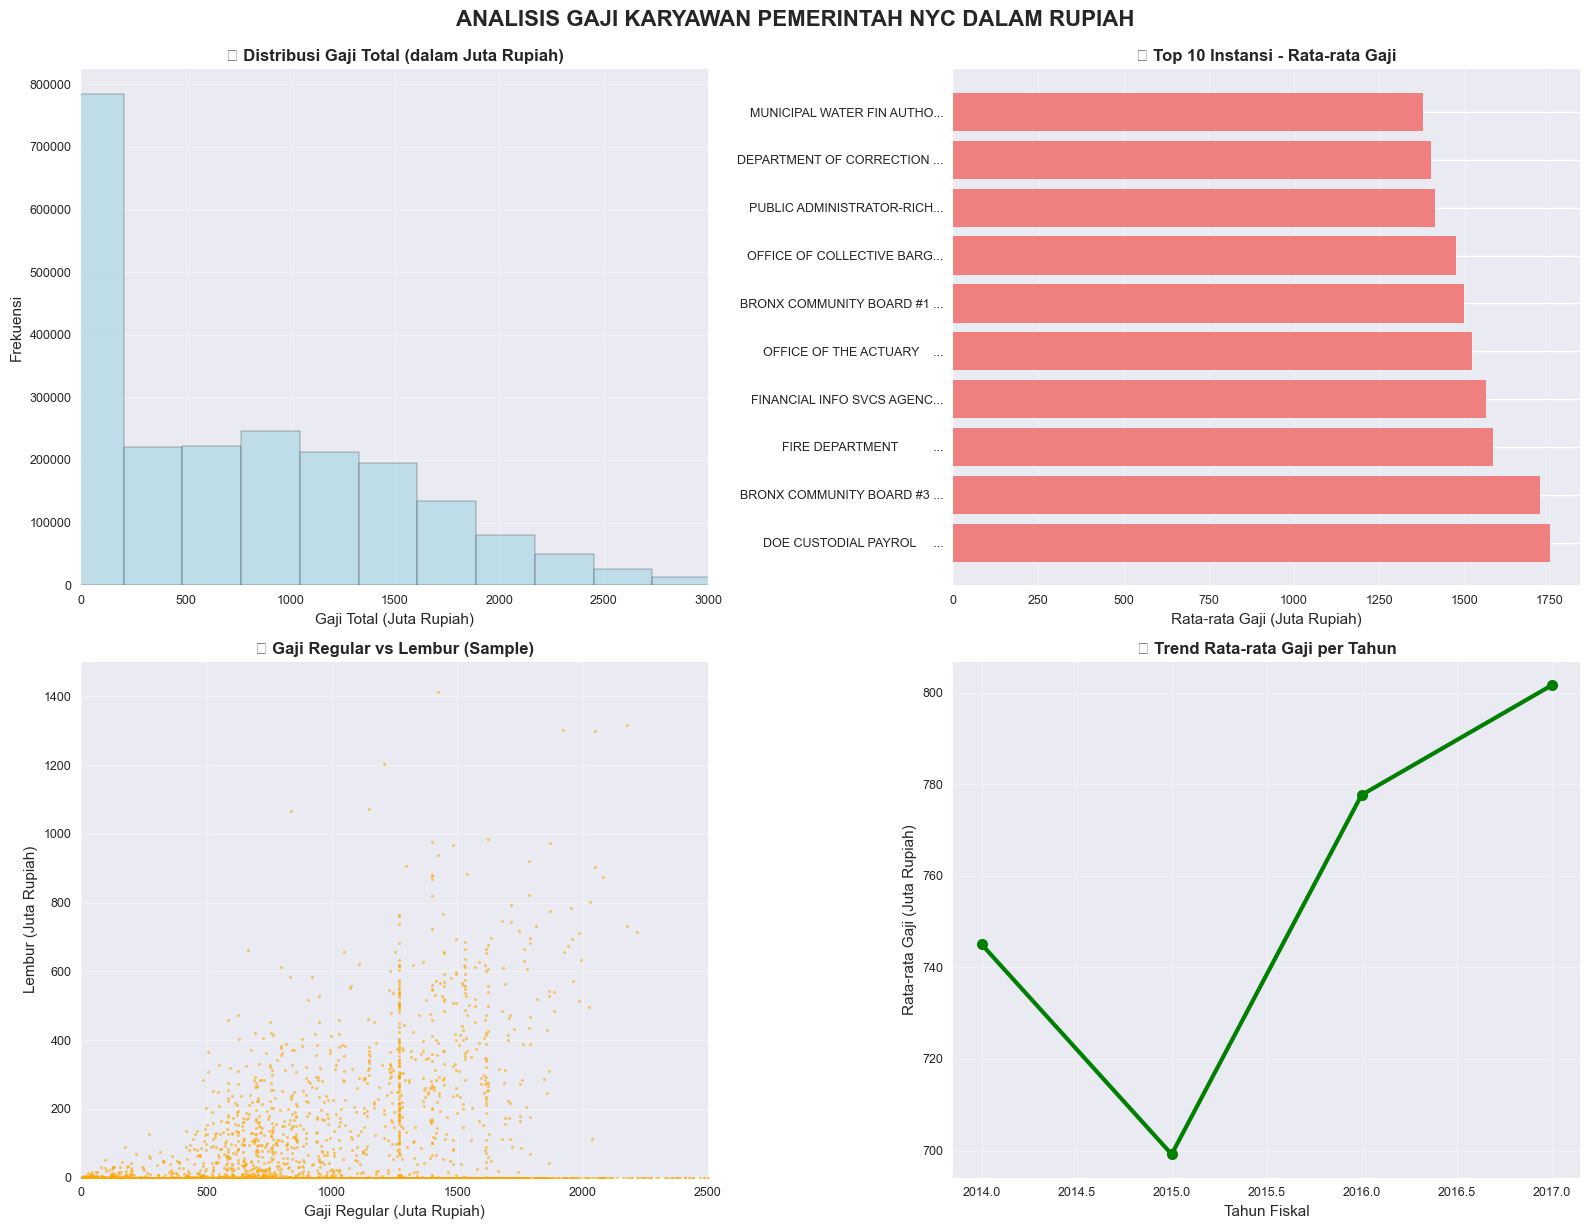

In [27]:
# VISUALISASI DALAM RUPIAH
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribusi Gaji Total dalam Rupiah
axes[0,0].hist(payroll['Gaji_Total_IDR']/1000000, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].set_title('📊 Distribusi Gaji Total (dalam Juta Rupiah)', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Gaji Total (Juta Rupiah)')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].set_xlim(0, 3000)  # Fokus pada range utama
axes[0,0].grid(True, alpha=0.3)

# 2. Top 10 Instansi dengan Gaji Tertinggi
top_10_instansi = payroll.groupby('Agency Name')['Gaji_Total_IDR'].mean().sort_values(ascending=False).head(10)
y_pos = range(len(top_10_instansi))
bars = axes[0,1].barh(y_pos, top_10_instansi.values/1000000, color='lightcoral')
axes[0,1].set_yticks(y_pos)
axes[0,1].set_yticklabels([name[:25] + '...' if len(name) > 25 else name for name in top_10_instansi.index], fontsize=9)
axes[0,1].set_title('🏢 Top 10 Instansi - Rata-rata Gaji', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Rata-rata Gaji (Juta Rupiah)')
axes[0,1].grid(axis='x', alpha=0.3)

# 3. Perbandingan Gaji vs Lembur
sample_data_idr = payroll.sample(min(5000, len(payroll)))
scatter = axes[1,0].scatter(sample_data_idr['Gaji_Regular_IDR']/1000000, 
                           sample_data_idr['Lembur_IDR']/1000000, 
                           alpha=0.6, s=3, color='orange')
axes[1,0].set_title('💰 Gaji Regular vs Lembur (Sample)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Gaji Regular (Juta Rupiah)')
axes[1,0].set_ylabel('Lembur (Juta Rupiah)')
axes[1,0].set_xlim(0, 2500)
axes[1,0].set_ylim(0, 1500)
axes[1,0].grid(True, alpha=0.3)

# 4. Trend Gaji dari Tahun ke Tahun
trend_tahunan = payroll.groupby('Fiscal Year')['Gaji_Total_IDR'].mean() / 1000000
axes[1,1].plot(trend_tahunan.index, trend_tahunan.values, marker='o', linewidth=3, markersize=8, color='green')
axes[1,1].set_title('📈 Trend Rata-rata Gaji per Tahun', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Tahun Fiskal')
axes[1,1].set_ylabel('Rata-rata Gaji (Juta Rupiah)')
axes[1,1].grid(True, alpha=0.3)

# Format angka pada grafik
for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(9)
    for label in ax.get_yticklabels():
        label.set_fontsize(9)

plt.tight_layout()
plt.suptitle('ANALISIS GAJI KARYAWAN PEMERINTAH NYC DALAM RUPIAH', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [28]:
# KESIMPULAN ANALISIS DALAM BAHASA INDONESIA
print("="*80)
print("                    🎯 KESIMPULAN ANALISIS PAYROLL NYC")
print("="*80)

# Hitung statistik penting
total_karyawan = len(payroll)
total_budget = payroll['Gaji_Total_IDR'].sum()
rata_gaji = payroll['Gaji_Total_IDR'].mean()
total_lembur = payroll['Lembur_IDR'].sum()

print(f"\n📊 RINGKASAN UTAMA:")
print("─" * 50)
print(f"✓ Total Karyawan: {total_karyawan:,} orang")
print(f"✓ Total Budget Gaji: Rp {total_budget:,.0f} (~{total_budget/1e12:.1f} Triliun)")
print(f"✓ Rata-rata Gaji: Rp {rata_gaji:,.0f} per tahun")
print(f"✓ Total Budget Lembur: Rp {total_lembur:,.0f} (~{total_lembur/1e12:.1f} Triliun)")
print(f"✓ Persentase Budget Lembur: {(total_lembur/total_budget)*100:.1f}% dari total gaji")

print(f"\n🏆 TEMUAN MENARIK:")
print("─" * 50)
gaji_tertinggi = payroll.loc[payroll['Gaji_Total_IDR'].idxmax()]
print(f"✓ Gaji tertinggi: Rp {gaji_tertinggi['Gaji_Total_IDR']:,.0f}")
print(f"  Jabatan: {gaji_tertinggi['Title Description']}")
print(f"  Instansi: {gaji_tertinggi['Agency Name']}")

instansi_terbesar = payroll['Agency Name'].value_counts().index[0]
jumlah_terbesar = payroll['Agency Name'].value_counts().iloc[0]
print(f"✓ Instansi dengan karyawan terbanyak: {instansi_terbesar}")
print(f"  Jumlah karyawan: {jumlah_terbesar:,} orang")

borough_tertinggi = payroll.groupby('Work Location Borough')['Gaji_Total_IDR'].mean().idxmax()
gaji_borough_tertinggi = payroll.groupby('Work Location Borough')['Gaji_Total_IDR'].mean().max()
print(f"✓ Wilayah dengan gaji rata-rata tertinggi: {borough_tertinggi}")
print(f"  Rata-rata gaji: Rp {gaji_borough_tertinggi:,.0f}")

print(f"\n🚨 INDIKASI KECURANGAN:")
print("─" * 50)
kasus_mencurigakan = len(payroll[payroll['OT Hours'] > 1000])
budget_mencurigakan = payroll[payroll['OT Hours'] > 1000]['Lembur_IDR'].sum()
print(f"✓ Kasus lembur ekstrem (>1000 jam): {kasus_mencurigakan:,} kasus")
print(f"✓ Budget untuk kasus mencurigakan: Rp {budget_mencurigakan:,.0f}")
print(f"✓ Potensi kerugian negara: Rp {budget_mencurigakan * 0.2:,.0f} - Rp {budget_mencurigakan * 0.4:,.0f}")
print(f"  (Asumsi 20-40% dari kasus ekstrem adalah fraud)")

print(f"\n💡 REKOMENDASI:")
print("─" * 50)
print("1. 🔍 Audit mendalam pada instansi dengan tingkat lembur 100%")
print("2. 🔍 Investigasi karyawan dengan lembur >1000 jam/tahun")
print("3. 🔍 Implementasi sistem validasi lembur berbasis digital")
print("4. 🔍 Cross-check data kehadiran dengan sistem kartu akses")
print("5. 🔍 Review kebijakan lembur dan approval workflow")
print("6. 🔍 Implementasi sistem peringatan otomatis untuk anomali")

print(f"\n🎖️  DAMPAK EKONOMI:")
print("─" * 50)
print(f"Jika berhasil mengurangi fraud lembur sebesar 25%:")
print(f"✓ Penghematan potensial: Rp {budget_mencurigakan * 0.25:,.0f}")
print(f"✓ Setara dengan gaji {int((budget_mencurigakan * 0.25) / rata_gaji):,} karyawan baru")
print("="*80)

                    🎯 KESIMPULAN ANALISIS PAYROLL NYC

📊 RINGKASAN UTAMA:
──────────────────────────────────────────────────
✓ Total Karyawan: 2,194,488 orang
✓ Total Budget Gaji: Rp 1,658,086,044,115,875 (~1658.1 Triliun)
✓ Rata-rata Gaji: Rp 755,568,517 per tahun
✓ Total Budget Lembur: Rp 117,521,110,305,278 (~117.5 Triliun)
✓ Persentase Budget Lembur: 7.1% dari total gaji

🏆 TEMUAN MENARIK:
──────────────────────────────────────────────────
✓ Gaji tertinggi: Rp 11,170,029,841
  Jabatan: ADMINISTRATIVE ENGINEER                                     
  Instansi: DEPARTMENT OF TRANSPORTATION  
✓ Instansi dengan karyawan terbanyak: DEPT OF ED PEDAGOGICAL        
  Jumlah karyawan: 423,338 orang
✓ Wilayah dengan gaji rata-rata tertinggi: QUEENS
  Rata-rata gaji: Rp 1,463,538,048

🚨 INDIKASI KECURANGAN:
──────────────────────────────────────────────────
✓ Kasus lembur ekstrem (>1000 jam): 3,552 kasus
✓ Budget untuk kasus mencurigakan: Rp 3,782,270,849,725
✓ Potensi kerugian negara: Rp 756,4

# Rekomendasi Tindakan
1. Audit mendalam instansi dengan lembur 100%
2. Investigasi karyawan dengan lembur >1000 jam/tahun
3. Implementasi sistem validasi digital
4. Cross-check dengan data kehadiran fisik
5. Review kebijakan dan approval workflow